<a href="https://colab.research.google.com/github/yyx462/ML/blob/main/classificationExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import math

# Load data

In [ ]:
df = pd.read_csv(r"possum_train.csv", index_col=0)

# Data Exploration

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
# look at the relation between head lenght and totlenth

In [ ]:
sb.scatterplot(data = df, x = "hdlngth", y = "totlngth")

In [ ]:
sb.boxplot(x="site", y="age", data=df ,palette="Set3"); 
plt.title("Boxplot showing the distribution of the age of possums from different sites.");

In [ ]:
# handling missing data

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.info()

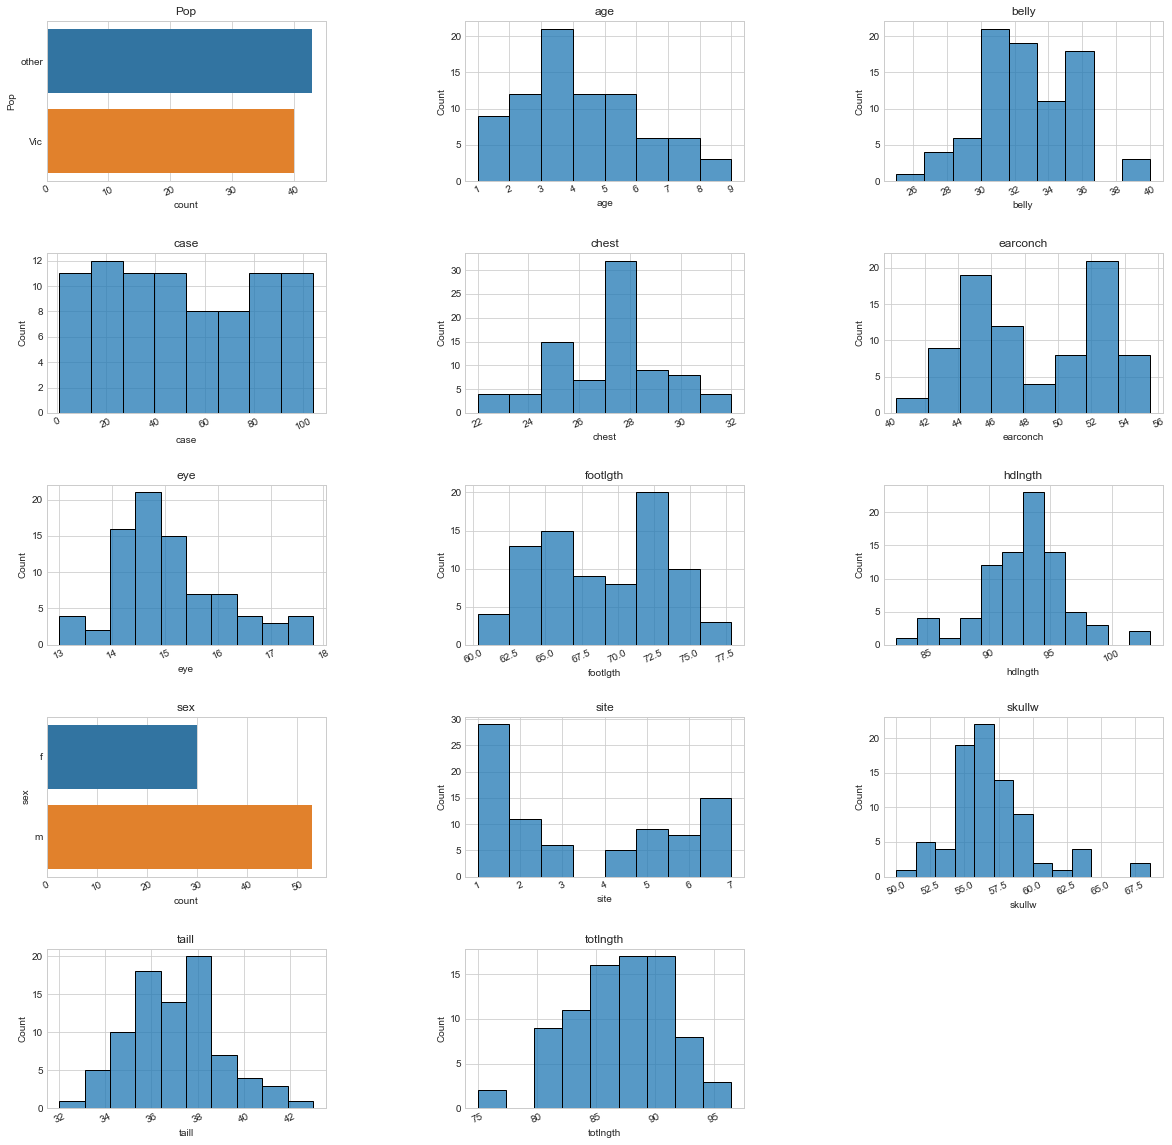

In [ ]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.histplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



In [ ]:
vars_to_plot = ['belly', 'chest', 'earconch', 'eye', 'footlgth','hdlngth', 'skullw', 'taill', 'totlngth']

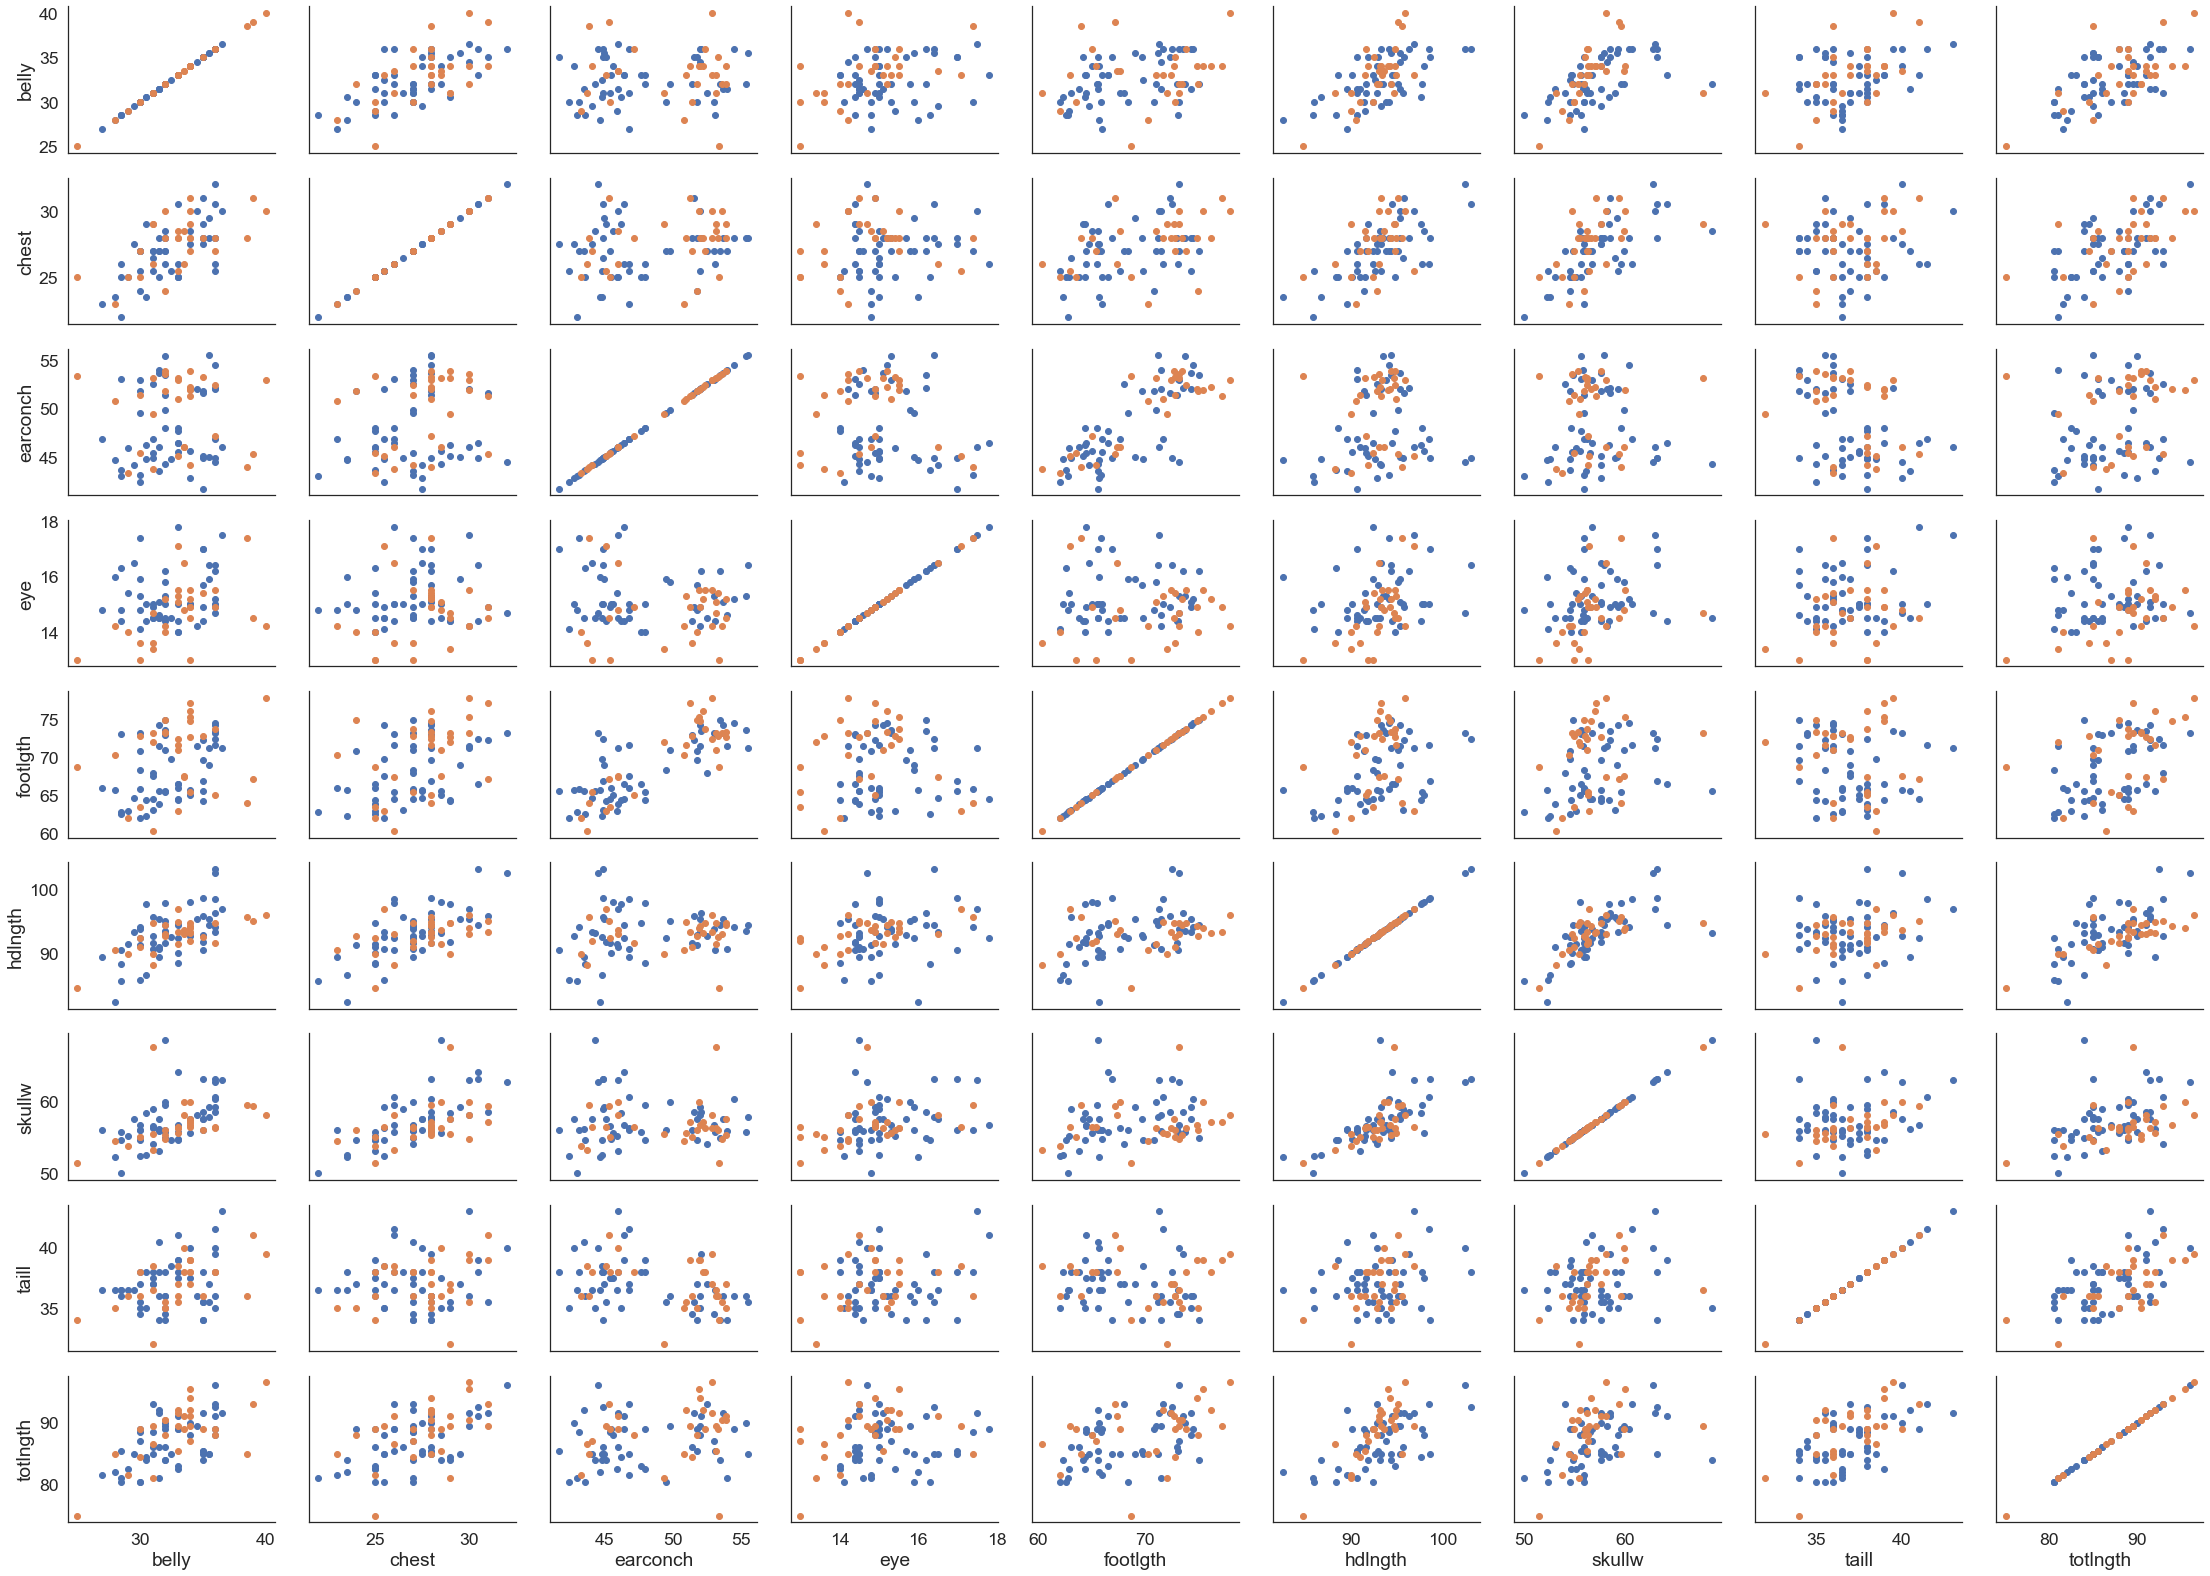

In [ ]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, hue="sex", y_vars=vars_to_plot, x_vars=vars_to_plot,  aspect=1.4, diag_sharey=False)
ax = g.map(plt.scatter, alpha=1.0)

# Prepare dataset

In [ ]:
# Some data is categorical, we must convert this to numerical data
# Maybe we want to only use a few features
# Split data into features and labels (targets)

In [ ]:
df.head()

In [ ]:
# remove nans

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
# column Pop and sex are not numerical
# we can either map Pop to 0, 1, 2 numbers, or make a 1 hot encoding

In [ ]:
df_initial = df.copy() # keep a copy of the original so we don't have to reload the data

In [ ]:
df['Pop'].unique()
df['sex'].unique()

array(['f', 'm'], dtype=object)

In [ ]:
df['sex']=df['sex'].map({"m":0,"f":1})

In [ ]:
df['Pop']=df['Pop'].map({"other":0,"Vic":1})

In [ ]:
# dropping site because I don't understand its intended meaning and it's sparsely populated
attributes_to_drop = ["site", "case"]
df.drop( attributes_to_drop,axis=1,inplace=True)

In [ ]:
df

,Pop,age,belly,chest,earconch,eye,footlgth,hdlngth,sex,skullw,taill,totlngth
30,0,3.0,31.0,26.0,43.7,13.6,60.3,88.2,1,53.2,38.5,86.5
65,0,3.0,28.5,25.0,43.6,16.3,62.6,88.4,0,54.6,36.0,80.5
64,0,3.0,32.0,26.0,48.0,15.0,65.5,97.8,0,59.6,38.0,89.0
53,0,5.0,36.0,28.0,47.2,14.9,65.0,91.6,1,56.4,38.0,88.0
93,0,4.0,31.0,27.0,45.4,14.9,64.5,91.6,0,56.6,37.5,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,2.0,32.0,28.0,55.4,15.3,73.7,93.5,0,55.7,36.0,90.0
75,0,2.0,36.0,32.0,44.5,14.7,73.2,102.5,0,62.8,40.0,96.0
32,0,3.0,33.5,28.5,46.0,14.8,67.6,93.6,1,59.9,40.0,89.0
97,1,3.0,40.0,30.0,52.9,14.2,77.9,95.9,1,58.1,39.5,96.5


In [ ]:
def process_data_frame(data_in):
    dataframe = data_in.copy()
    dataframe['sex']=dataframe['sex'].map({"m":0,"f":1})
    dataframe['Pop']=dataframe['Pop'].map({"other":0,"Vic":1})
    
    attributes_to_drop = ["site", "case"]
    dataframe.drop( attributes_to_drop,axis=1,inplace=True)
    # convert 'sex' and 'pop' to numerical values
    # drop irrelevant features
    return dataframe

In [ ]:
def get_features_and_target(dataframe,target="sex"):
    label = dataframe[target].copy()
    features = dataframe.drop(target,axis=1).copy()
    return features, label

In [ ]:
df_processed = process_data_frame(df_initial)

In [ ]:
target = "sex"
X, y = get_features_and_target(df_processed, target)

# Set up model and run cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5)

train_err = []
crossval_err = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = SVC(kernel='linear').fit(X_train, y_train)
    
    predictions_training = model.predict(X_train)
    predictions = model.predict(X_test)
    
    print(f"Accuracy on training set:{accuracy_score(predictions_training,y_train)}")
    print(f"Accuracy on test set:{accuracy_score(predictions,y_test)}")

Accuracy on training set:0.671875
Accuracy on test set:0.625
Accuracy on training set:0.609375
Accuracy on test set:0.75
Accuracy on training set:0.640625
Accuracy on test set:0.625
Accuracy on training set:0.65625
Accuracy on test set:0.5625
Accuracy on training set:0.640625
Accuracy on test set:0.625


# Visualising SVM classification plane
(simplified -- we only consider two features)
(using a kernel (radial basis functions))

In [ ]:
X_2_features=X[['belly','footlgth']].copy()

In [ ]:
best_model = SVC(kernel='rbf',gamma='auto').fit(X_2_features, y)

In [ ]:
def two_d_features():
    h = 0.2
    x_min, x_max = X[['belly']].min().values[0], X[['belly']].max().values[0]
    y_min, y_max = X[['footlgth']].min().values[0], X[['footlgth']].max().values[0]
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
xx, yy = two_d_features()

In [ ]:
predictions_train_set = best_model.predict(X)

In [ ]:
predictions_plane = best_model.predict(np.c_[xx.ravel(),yy.ravel()])
predictions_plane=predictions_plane.reshape(xx.shape)

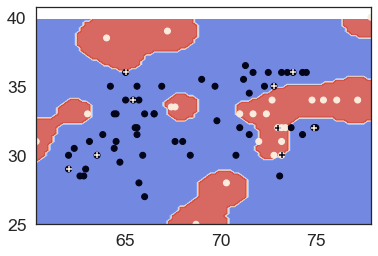

In [ ]:
plt.contourf(yy,xx,predictions_plane,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['footlgth'],X['belly'],c=predictions_train_set)
plt.scatter(X['footlgth'],X['belly'],c=y,marker='+')